In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 인공신경망 모델 클래스 정의
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2,5)
        self.fc2 = nn.Linear(5,1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# 데이터 생성
X = torch.randn(100, 2)
y = ((X[:, 0] > 0) & (X[:, 1] > 0)).float()

print(X)
print(y)

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


tensor([[ 9.5375e-01, -1.0369e+00],
        [ 2.9768e-01,  1.4086e+00],
        [ 1.0190e+00,  3.6947e-01],
        [-1.2662e+00,  1.2628e+00],
        [ 5.8084e-02, -6.5725e-01],
        [ 2.4077e-01, -2.3564e-01],
        [-1.9443e+00, -8.7474e-02],
        [ 1.0831e+00, -1.4150e+00],
        [ 2.2531e+00,  6.7781e-01],
        [ 4.1964e-01,  1.0296e+00],
        [-7.5227e-01,  1.0283e-03],
        [-1.5589e+00,  1.9771e-03],
        [-1.0238e+00,  2.0664e+00],
        [ 1.5458e+00, -3.9971e-01],
        [-2.2777e-01, -6.4031e-01],
        [ 1.1809e-01, -5.0478e-01],
        [-5.1184e-01,  4.2069e-01],
        [ 1.0926e-01,  8.9644e-01],
        [ 2.2806e-01,  5.4356e-02],
        [-3.2279e-01, -5.6890e-01],
        [-1.4870e+00,  1.5149e+00],
        [-7.3986e-01, -2.7452e+00],
        [ 9.9009e-01,  1.0175e+00],
        [-3.9251e-01,  9.9679e-01],
        [ 7.9477e-01, -6.8449e-02],
        [ 1.7907e+00,  1.6397e-01],
        [-3.4231e-01, -1.6312e+00],
        [ 3.0143e-01,  3.234

In [5]:
# 모델 생성
model = SimpleNet()
print(model)
print(model.fc1.weight, model.fc1.bias)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.6911,  0.6616],
        [-0.4476, -0.5758],
        [ 0.4111,  0.2877],
        [-0.1489,  0.6022],
        [-0.1606, -0.3952]], requires_grad=True) Parameter containing:
tensor([ 0.3913,  0.5643,  0.6078,  0.6627, -0.6442], requires_grad=True)


In [6]:
# 손실 함수와 옵티마이저 정의
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

BCE loss tensor(0.7369, grad_fn=<BinaryCrossEntropyBackward0>)


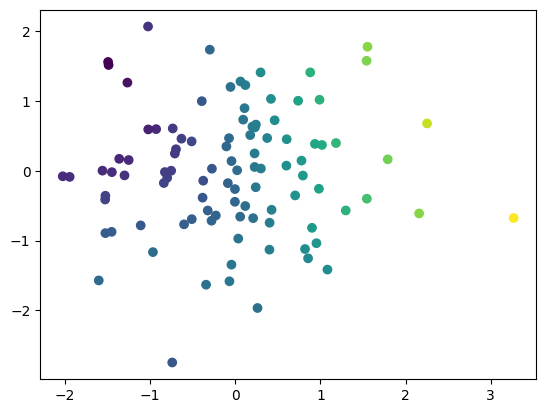

학습 종료!


In [11]:
# 학습 시작
for epoch in range(100):
    # 순전파 단계
    y_pred = model(X)

    # print("예측값", y_pred)
    # print("참값", y)

    # 손실 계산
    loss = criterion(y_pred.squeeze(), y)

    # print("BCE loss" ,loss)
    # print("학습 전 가중치", model.fc1.weight, model.fc1.bias)

    # 역전파 단계
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print("학습 후 가중치", model.fc1.weight, model.fc1.bias)

    if epoch % 100 == 0:
        print("BCE loss", loss)

        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().squeeze())
        plt.show()

print("학습 종료!")



In [14]:
X = torch.Tensor([[0, 0],
                  [-1, 1],
                  [1, -1],
                  [1, 1]])
y_pred = model(X)
print(y_pred)

tensor([[0.1913],
        [0.2103],
        [0.1736],
        [0.8416]], grad_fn=<SigmoidBackward0>)


In [15]:
# 0 0 0 1
y = ((X[:, 0] > 0) & (X[:, 1] > 0)).float()
print(y)

tensor([0., 0., 0., 1.])
